In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv('C:\\Users\\Administrator\\Desktop\\新建文件夹\\拉勾网数据分析师爬取结果.csv')#用txt转化为utf-8的格式

In [44]:
df.drop('﻿',axis=1,inplace=True)#首列可以在保存时index=False，在此处去除需要复制空格粘贴，居然是一个‘点’

In [45]:
df.rename(columns={'0':'name','1':'staff','2':'position','3':'stage','4':'expr','5':'edu','6':'salary'},inplace=True)

In [46]:
df.head()

,name,staff,position,stage,expr,edu,salary
0,蚂蚁短租,150-500人,数据分析师,成熟型(C轮),1-3年,本科,10k-20k
1,多彩饰家,150-500人,数据分析师,成长型(B轮),3-5年,本科,20k-30k
2,滴滴出行,500-2000人,数据分析师,成熟型(D轮及以上),3-5年,本科,20k-30k
3,在行&amp;分答,50-150人,数据分析师,成长型(A轮),1-3年,本科,10k-18k
4,宜信,2000人以上,数据分析师,上市公司,1-3年,本科,15k-28k


In [6]:
df['position'].value_counts()

数据分析师                       228
高级数据分析师                      32
资深数据分析师                      10
大数据分析师                        9
大数据开发工程师                      9
数据工程师                         8
初级数据分析师                       4
大数据工程师                        4
金融数据分析师                       4
数据研发工程师                       3
数据分析员                         3
大数据研发工程师                      3
数据分析师（实习生）                    2
大数据开发                         2
商业数据分析师                       2
数据分析师（实习）                     2
大数据(开发、分析、算法)                 2
分析师                           2
网站数据分析师                       2
数据开发工程师                       2
协议数据分析师                       2
数据分析师-北京-03875                2
ASO数据分析师                      2
数据分析师（北京-海淀区）                 1
数据分析师1                        1
数据科学家/高级数据分析师                 1
流量数据分析师                       1
数据开发                          1
数据分析师(产品分析)-数据战略              1
美团急聘数据分析师                     1
                           ... 
数据分析师－金融

In [47]:
df1 = df.loc[(df['position']=='初级数据分析师')|(df['position']=='高级数据分析师')|(df['position']=='数据分析师')]

In [57]:
df1['expr'].value_counts()

1-3年     107
3-5年      99
不限        39
5-10年     14
应届毕业生      4
1年以下       1
Name: expr, dtype: int64

In [55]:
df1['stage'].value_counts()

上市公司          69
成熟型(D轮及以上)    40
成长型(B轮)       38
成长型(A轮)       35
成长型(不需要融资)    24
成熟型(C轮)       17
初创型(天使轮)      13
初创型(未融资)      11
成熟型(不需要融资)    11
初创型(不需要融资)     6
Name: stage, dtype: int64

In [69]:
df3 = pd.DataFrame(df1['salary'].value_counts())

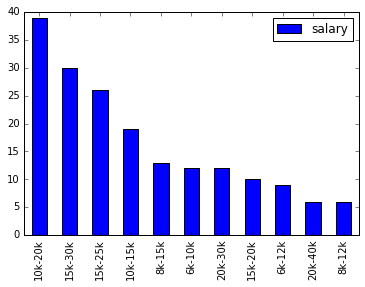

In [74]:
df3.loc[df3['salary']>=6].plot(kind='bar')

In [14]:
df1['staff'].str.split('-',expand=True)

,0,1
0,150,500人
1,150,500人
2,500,2000人
3,50,150人
4,2000人以上,None
5,150,500人
6,2000人以上,None
7,500,2000人
8,150,500人
9,50,150人


In [19]:
df2 = df1['salary'].str.split('-',expand=True)

In [26]:
df2.rename(columns={0:'salary_min',1:'salary_max'},inplace=True)

In [ ]:
df2['salary_min']=df2['salary_min'].str.replace(('k','')

In [91]:
df2['salary_min']=df2['salary_min'].str.replace('K','')

In [93]:
df2['salary_min']=df2['salary_min'].str.replace('以上','')

In [98]:
df2['salary_min']=df2['salary_min'].astype(np.int64)

In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 437
Data columns (total 2 columns):
salary_min    264 non-null int64
salary_max    263 non-null object
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [106]:
df4 = pd.concat([df1,df2['salary_min']],axis=1)

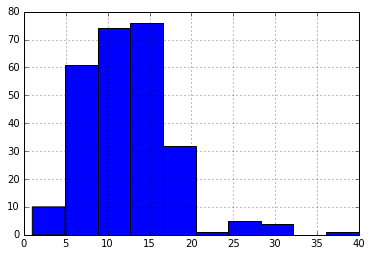

In [107]:
df4['salary_min'].hist()